# Have the music genres people listen to changed?

In [1]:
%matplotlib inline
# import dependencies
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
# load data
spoti_df = pd.read_csv('../output_data/spotipy_data.csv')

## Top 10 genres: genres with the most number of songs in top 100 year playlists

#### In order to answer this question, we first looked at the top 10 genres for each of the 6 years in our data (2017-2022). In this analysis, the top 10 genres are defined as the genres with the largest number of songs in the top 100 for that year. 

In [3]:
# create a new df where we unpack the artist genre column, so we can look at genre distribution across the years
genre_df = spoti_df
genre_df["artist genre"] = genre_df['artist genre'].apply(literal_eval)
genre_df = genre_df.explode("artist genre")

In [4]:
# group by year, and count number of songs per genre in each year
genre_by_year = genre_df.groupby("Year", as_index = True)["artist genre"].value_counts()

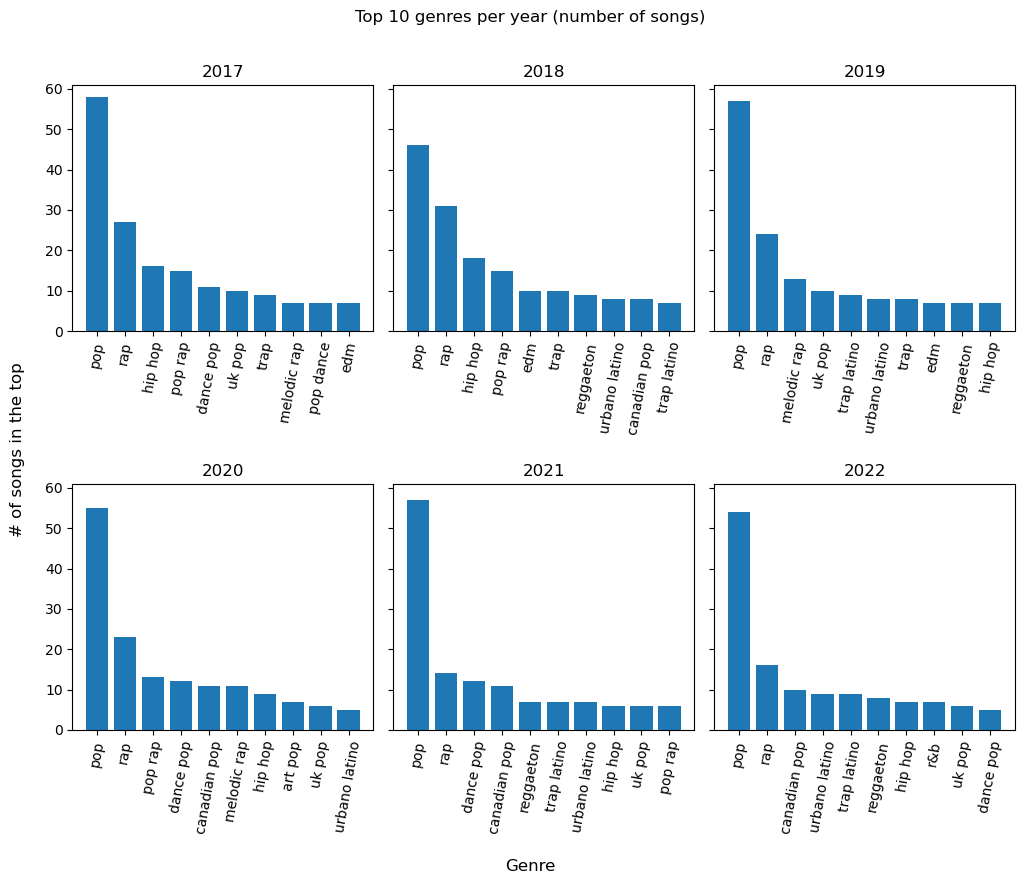

In [5]:
# create a plot showing the top 10 genres for each year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 8))
axs[0, 0].bar(genre_by_year[2017][0:10].index.to_list(), [genre_by_year[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(genre_by_year[2018][0:10].index.to_list(), [genre_by_year[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(genre_by_year[2019][0:10].index.to_list(), [genre_by_year[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(genre_by_year[2020][0:10].index.to_list(), [genre_by_year[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(genre_by_year[2021][0:10].index.to_list(), [genre_by_year[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(genre_by_year[2022][0:10].index.to_list(), [genre_by_year[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.tick_params(axis = 'x', rotation = 80)
    
# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Top 10 genres per year (number of songs)", y = 1.05)

# save figure 
fig.savefig("../output_data/top_genres_numsongs.png", bbox_inches='tight')

# plot figure
plt.show()

#### As we can see from the above plots, while some genres have stayed consistently in the top 10 (e.g. pop and rap), others fluctuate throughout the 6 years. We thus wanted to have a closer look at some of the specific genres and see how the number of songs for these genres varies by year

In [6]:
# get number of songs per year for specific genres
years = [2017, 2018, 2019, 2020, 2021, 2022]
pop = []
rap = []
hip_hop = []
canadian_pop = []
edm = []
dance_pop = []

for year in years:
    pop.append(genre_by_year[year]["pop"])
    rap.append(genre_by_year[year]["rap"])
    hip_hop.append(genre_by_year[year]["hip hop"])
    canadian_pop.append(genre_by_year[year]["canadian pop"])
    edm.append(genre_by_year[year]["edm"])
    dance_pop.append(genre_by_year[year]["dance pop"])

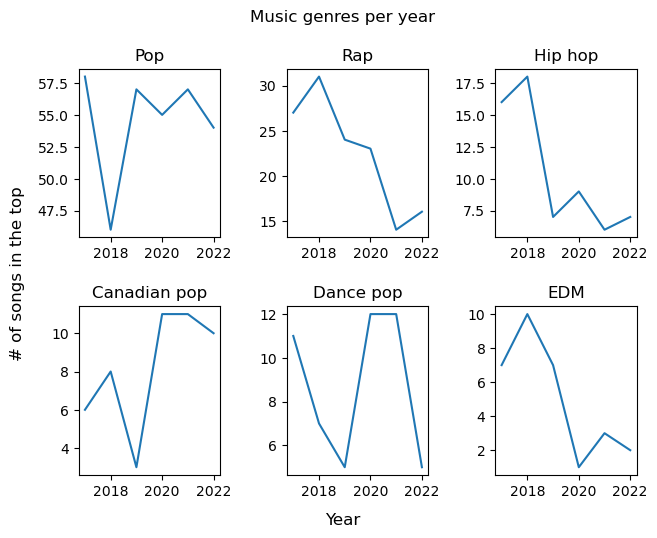

In [7]:
# create subplot
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(years, pop)
axs[0,0].set_title('Pop')
axs[0,1].plot(years, rap)
axs[0,1].set_title('Rap')
axs[0,2].plot(years, hip_hop)
axs[0,2].set_title('Hip hop')
axs[1,0].plot(years, canadian_pop)
axs[1,0].set_title('Canadian pop')
axs[1,1].plot(years, dance_pop)
axs[1,1].set_title('Dance pop')
axs[1,2].plot(years, edm)
axs[1,2].set_title('EDM')

# fine tune it
fig.tight_layout(h_pad=1.8)
fig.supxlabel('Year', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Music genres per year", y = 1.05)

# save figure
fig.savefig("../output_data/specific_genres.png", bbox_inches='tight')

# plot figure
plt.show()

#### As these plots evidence, even the top 2 genres (pop and rap) fluctuate throughout the years. Other genres seem to have more consistent trends, with both hip-hop and EDM steadily decreasing from 2018 on. 

#### Two genres present curious trajectories though: whilst the number of canadian pop songs shoots up and in 2019 and remains at similar levels in the following years, the number of dance pop songs shoots up in "the covid years" (2020 and 2021), to then decrease steadily in 2022. 

#### And whilst the rise in Canadian pop can be traced to only 5 artists - where Drake accounts for nearly 50% of the songs, a lot more artists contributed to the dance pop rise in 2020 and 2021.

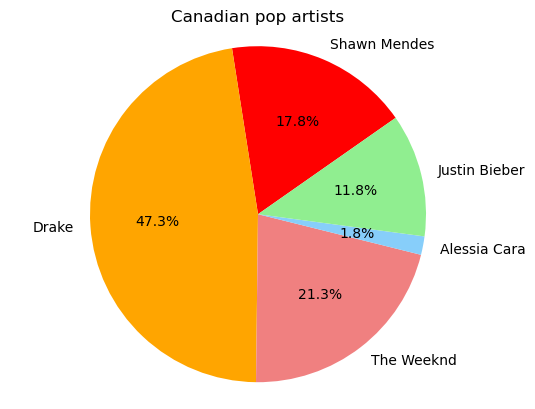

In [8]:
# get the names of canadian artists 
canadian_artists = pd.Series(genre_df[genre_df["artist genre"] == "canadian pop"]["artist name"].unique())

# and the song count for each of them
song_count = []
[song_count.append(len(genre_df[genre_df["artist name"] == artist].value_counts())) for artist in canadian_artists]
    
# define the plot colours and section separation
colors = ["red", "orange", "lightcoral", "lightskyblue", "lightgreen"]
explode = (0, 0, 0, 0, 0)

# create pie chart
plt.pie(song_count, explode=explode, labels=canadian_artists, colors=colors,
        autopct="%1.1f%%", startangle=35)
plt.axis("equal")
plt.title("Canadian pop artists")

# save fig
plt.savefig("../output_data/canadian_pop_artists.png")

# plot fig
plt.show()    

In [9]:
pop_dance_artists = pd.Series(genre_df[genre_df["artist genre"] == "dance pop"]["artist name"].unique())
pop_dance_artists

0        Camila Cabello
1            Bruno Mars
2             Sean Paul
3              Dua Lipa
4                Avicii
5                  P!nk
6         Calvin Harris
7          Jason Derulo
8              DJ Snake
9            Bebe Rexha
10    Justin Timberlake
11            Lady Gaga
12             Doja Cat
13           Joel Corry
14      Black Eyed Peas
15              Shakira
16         David Guetta
dtype: object

#### Each of these genres will have different average features. We now look at these features for each genre, so that we can see how these compare with overall trends in audio features across the past 6 years.

In [10]:
# create a df for each genre
pop_features = genre_df[genre_df["artist genre"] == "pop"]
rap_features = genre_df[genre_df["artist genre"] == "rap"]
hip_hop_features = genre_df[genre_df["artist genre"] == "hip hop"]
canadian_pop_features = genre_df[genre_df["artist genre"] == "canadian pop"]
edm_features = genre_df[genre_df["artist genre"] == "edm"]
dance_pop_features = genre_df[genre_df["artist genre"] == "dance pop"]

In [11]:
# as we will do the same analysis for each genre, we are defining a function

# the function takes arguments df (dataframe with track features for a specific genre) and genre (string with genre name)

def genre_feats(df, genre):
    
    # calculate average for each feature per year
    danceability = df.groupby("Year", as_index = True)["danceability"].mean()
    energy = df.groupby("Year", as_index = True)["energy"].mean()
    liveness = df.groupby("Year", as_index = True)["liveness"].mean()
    valence = df.groupby("Year", as_index = True)["valence"].mean()
    tempo = df.groupby("Year", as_index = True)["tempo"].mean()
    duration = df.groupby("Year", as_index = True)["duration_ms"].mean()
    
    # plot features 
    years = [2017, 2018, 2019, 2020, 2021, 2022]

    fig, axs = plt.subplots(2, 3)
    axs[0,0].plot(years, danceability)
    axs[0,0].set_title('Danceability')
    axs[0,1].plot(years, energy)
    axs[0,1].set_title('Energy')
    axs[0,2].plot(years, liveness)
    axs[0,2].set_title('Liveness')
    axs[1,0].plot(years, valence)
    axs[1,0].set_title('Valence')
    axs[1,1].plot(years, tempo)
    axs[1,1].set_title('Tempo')
    axs[1,2].plot(years, duration)
    axs[1,2].set_title('Duration')

    # fine tune it
    fig.tight_layout(h_pad=1.8)
    fig.supxlabel('Year', y = -0.03)
    fig.supylabel('Average values', x = -0.02)
    plt.suptitle(f"{genre} features per year", y = 1.05)

    # save figure
    fig.savefig(f"../output_data/{genre}_features.png", bbox_inches='tight')

    # plot figure
    plt.show()


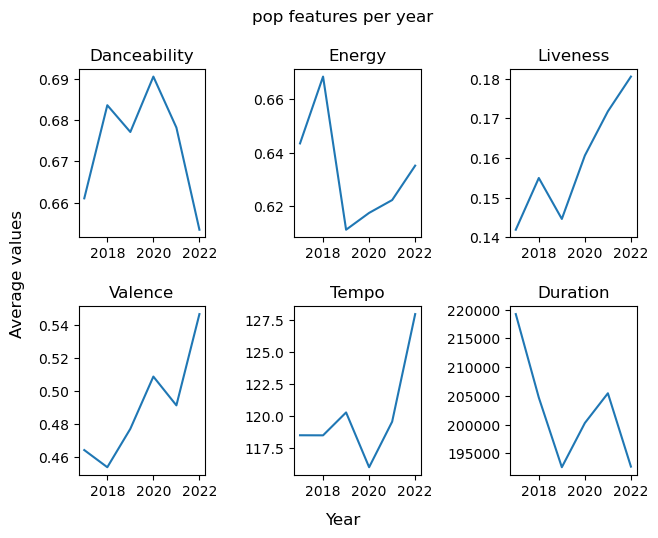

In [12]:
# plot pop features
genre_feats(pop_features, "pop")

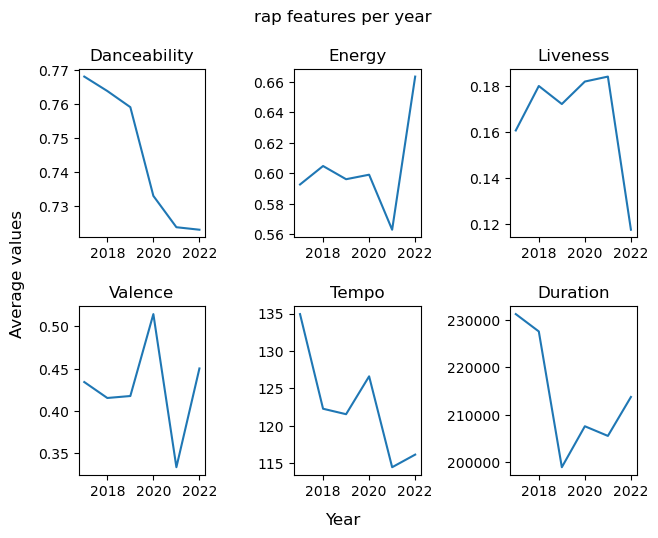

In [13]:
# plot rap features
genre_feats(rap_features, "rap")

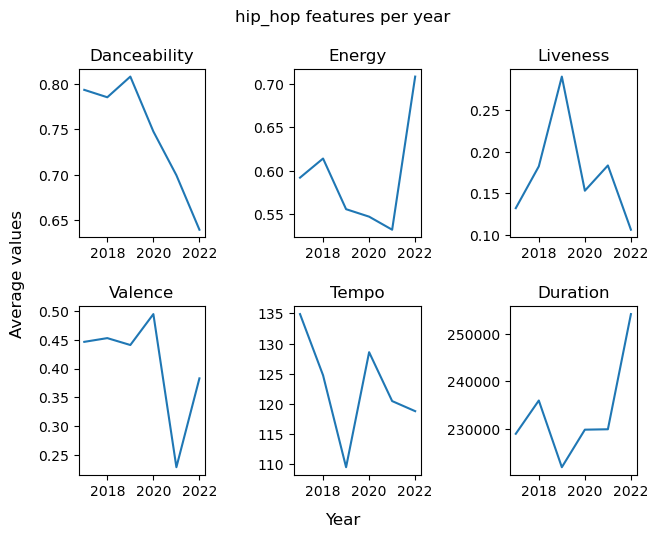

In [14]:
# plot hip hop features
genre_feats(hip_hop_features, "hip_hop")

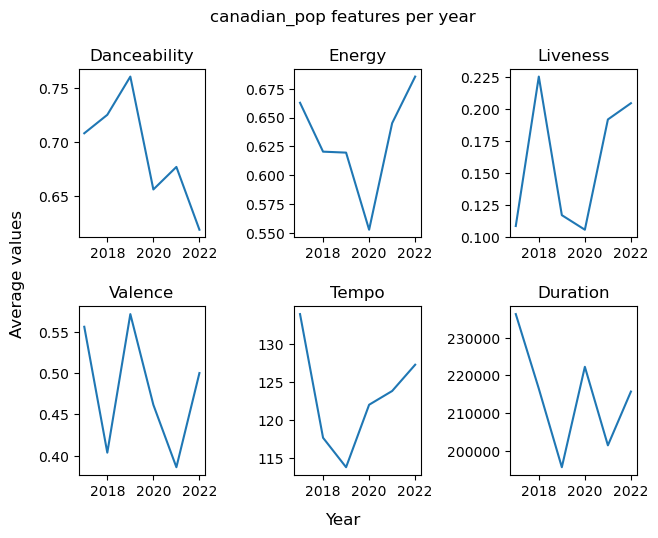

In [15]:
# plot canadian pop features
genre_feats(canadian_pop_features, "canadian_pop")

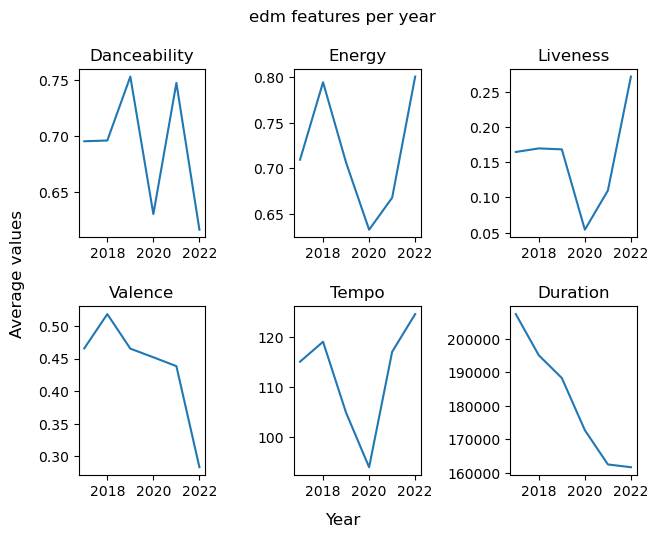

In [16]:
# plot edm features
genre_feats(edm_features, "edm")

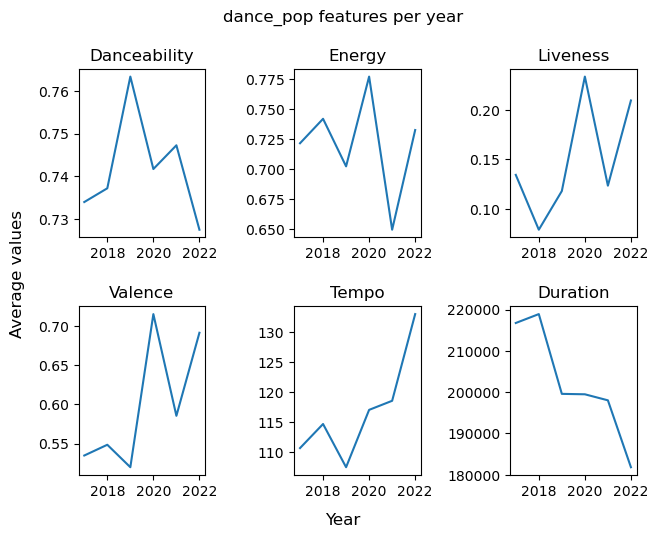

In [17]:
# plot dance pop features
genre_feats(dance_pop_features, "dance_pop")

## Top 10 genres: genres with the highest average popularity per year

#### Another way to measure top genres is to look at the genres of the most popular tracks in each year. 

#### The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

In [18]:
# calculate average popularity for each genre, each year and sort values from highest to lowest popularity
popularity_df = genre_df.groupby(["Year","artist genre"])["track popularity"].mean().sort_values(ascending=False)

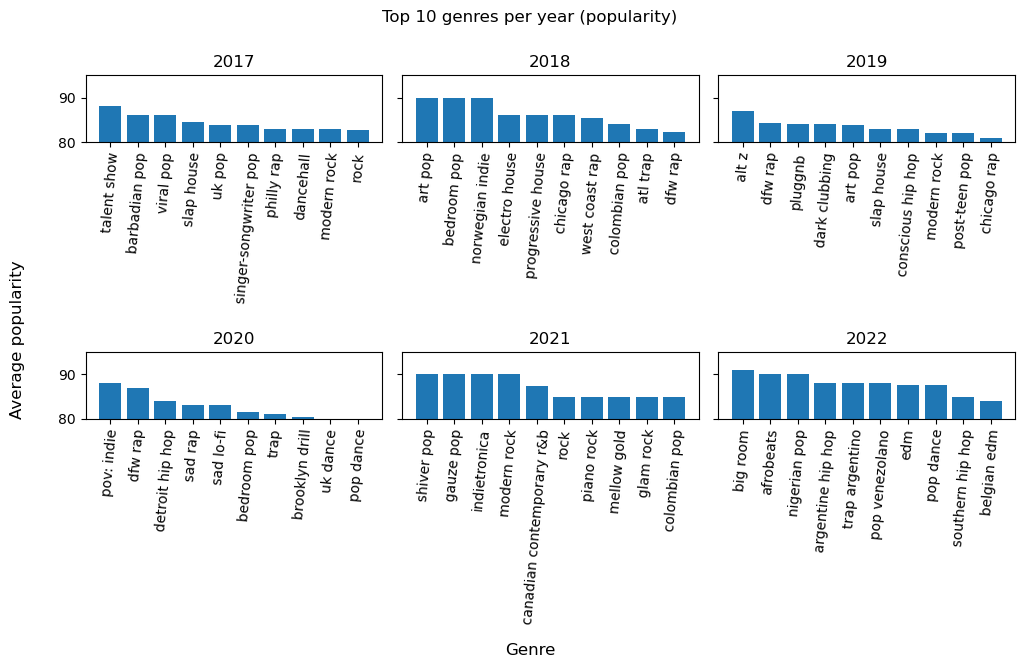

In [19]:
# plot most popular genres per year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 6))
axs[0, 0].bar(popularity_df[2017][0:10].index.to_list(), [popularity_df[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(popularity_df[2018][0:10].index.to_list(), [popularity_df[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(popularity_df[2019][0:10].index.to_list(), [popularity_df[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(popularity_df[2020][0:10].index.to_list(), [popularity_df[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(popularity_df[2021][0:10].index.to_list(), [popularity_df[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(popularity_df[2022][0:10].index.to_list(), [popularity_df[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.set_ylim([80,95])
    ax.tick_params(axis = 'x', rotation = 85)


# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('Average popularity', x = -0.02)
plt.suptitle("Top 10 genres per year (popularity)", y = 1.05)

# save figure
plt.savefig("../output_data/top_genres_popularity.png", bbox_inches='tight')

# plot figure
plt.show()

#### The picture is a lot less consistent when looking at track popularity (compared to number of songs), with no informative pattern emerging. 